<a href="https://colab.research.google.com/github/NMT20104010/BTVN/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Data/food

/content/drive/MyDrive/Data/food


In [3]:
ls

food.h5  test/  train/


In [4]:
import tensorflow as tf
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(
    './train/',
    target_size= (200, 200),
    batch_size = 16,
    class_mode = 'categorical')
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)


test_generator = test_data.flow_from_directory(
    './test/', 
    target_size= (200, 200), 
    batch_size = 16,
    class_mode = 'categorical')


Found 1248 images belonging to 10 classes.
Found 456 images belonging to 10 classes.


In [5]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu', input_shape = (200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(train_generator, epochs=10, batch_size=128)

Epoch 1/10
78/78 [==============================] - 1694s 22s/step - loss: 2.0537 - accuracy: 0.1875
Epoch 2/10
78/78 [==============================] - 1670s 21s/step - loss: 1.9030 - accuracy: 0.2348
Epoch 3/10
78/78 [==============================] - 1655s 21s/step - loss: 1.7534 - accuracy: 0.3462
Epoch 4/10
78/78 [==============================] - 1649s 21s/step - loss: 1.5772 - accuracy: 0.4247
Epoch 5/10
78/78 [==============================] - 1650s 21s/step - loss: 1.4495 - accuracy: 0.4752
Epoch 6/10
78/78 [==============================] - 1641s 21s/step - loss: 1.2996 - accuracy: 0.5353
Epoch 7/10
78/78 [==============================] - 1640s 21s/step - loss: 1.2439 - accuracy: 0.5777
Epoch 8/10
78/78 [==============================] - 1647s 21s/step - loss: 1.1815 - accuracy: 0.6154
Epoch 9/10
78/78 [==============================] - 1651s 21s/step - loss: 1.0367 - accuracy: 0.6386
Epoch 10/10
78/78 [==============================] - 1650s 21s/step - loss: 0.9536 - accura

In [ ]:
model.save('food.h5')


In [7]:
from keras.models import load_model
model_food=load_model('food.h5')

1/1 [==============================] - 2s 2s/step
This is: banh mi


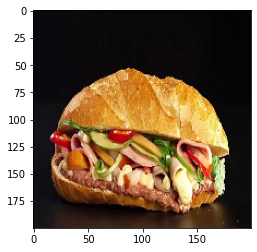

In [8]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/banhmi.jpg',target_size = (200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
class_name=['banh mi','banh tet','banh xeo','bun bo','ca phe',
            'cha ca','com tam','nui',
            'pho','thit kho']
a= int(np.argmax(result,axis=1))
print("This is:", class_name[a])